In [1]:
delta_m1545 = -1.545
delta_4455 = 4.455
delta_4955 = 4.955
delta_13455 = 13.455
d_m1545 = '-1.545'
d_4455 = '4.455'
d_4955 = '4.955'
d_13455 = '13.455'

In [2]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd

In [4]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [3]:
def movingaverage(values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

# Figure 3 (energy over training)

In [9]:
df = pd.read_csv('./../../Data/QMC_Data/kz_qmc_samples/avg_observables.csv', sep=',')
qmcE_13455 = np.array(df["energy"])[np.where(df["delta"]==delta_13455)]

In [7]:
delta = 13.455

# Read in the data

# 1D
VMC_train1 = np.load('../data/Final_Models/train_quantities/OneD_rnn/delta_13.455/seed_111/vmc_only/Energy.npy')
Data_train1 = np.load('../data/Final_Models/train_quantities/OneD_rnn/delta_13.455/seed_111/Exp_data/Energy.npy')
Hybrid_train1 = np.load('../data/Final_Models/train_quantities/OneD_rnn/delta_13.455/seed_111/hybrid_train/1000_ds/lr_5e-05/Energy.npy')
# 2D
VMC_train2 = np.load('../data/Final_Models/train_quantities/TwoD_rnn/delta_13.455/seed_111/vmc_only/Energy.npy')
Data_train2 = np.load('../data/Final_Models/train_quantities/TwoD_rnn/delta_13.455/seed_111/Exp_data/Energy.npy')
Hybrid_train2 = np.load('../data/Final_Models/train_quantities/TwoD_rnn/delta_13.455/seed_111/hybrid_train/100_ds/lr_0.001/Energy.npy')

# Moving average
window = 25

#1D
VMC_E1 = (movingaverage(VMC_train1,window))
Data_E1 = (movingaverage(Data_train1,window))
Hybrid_E1 = (movingaverage(Hybrid_train1,window))
#2D
VMC_E2 = (movingaverage(VMC_train2,window))
Data_E2 = (movingaverage(Data_train2,window))
Hybrid_E2 = (movingaverage(Hybrid_train2,window))

# Plotting Quantities
plot_x = np.arange(1,1501,10)

#1D
plot_VMC_E1 = VMC_E1[plot_x]
plot_Data_E1 = Data_E1[plot_x]
plot_Hybrid_E1 = Hybrid_E1[plot_x]
#2D
plot_VMC_E2 = VMC_E2[plot_x]
plot_Data_E2 = Data_E2[plot_x]
plot_Hybrid_E2 = Hybrid_E2[plot_x]


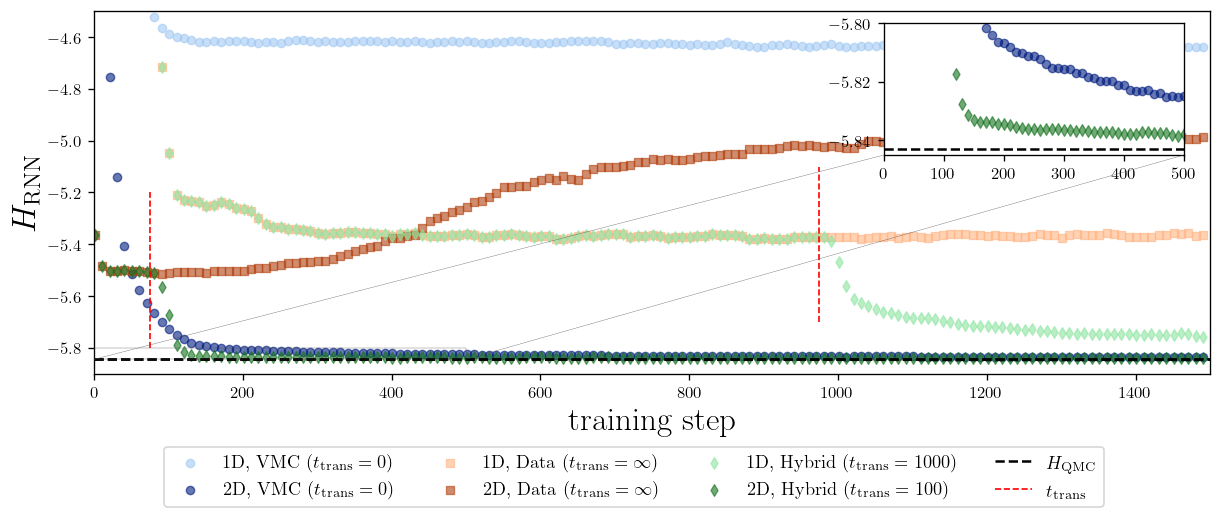

In [16]:
plt.rcParams.update({"text.usetex":True,"font.family": "Helvetica"})

fig = plt.figure(1,figsize=(12,4), dpi=120, facecolor='w', edgecolor='k')
colors1 = sns.color_palette('pastel')
colors2 = sns.color_palette('dark')

grid = plt.GridSpec(1, 1, wspace=0.4, hspace=100.0)
ax1 = fig.add_subplot(grid[0,0])
axins = inset_axes(ax1, width=2.5, height=1.1, bbox_to_anchor=(.7, 0.58), bbox_transform=ax1.transAxes, loc=3)
mark_inset(ax1, axins, fc='none', ec="0.3", loc1=3, loc2=4, linewidth=0.2, zorder=3)
xcut=1500

### Inset ###
axins.hlines(qmcE_13455,0,xcut,linestyle='--',color='k')
axins.scatter(plot_x,plot_VMC_E2[0:5000],marker = 'o',color=colors2[0],s=25,alpha=0.6,linewidths=0.8,edgecolors=colors2[0])
axins.scatter(plot_x,plot_Hybrid_E2[0:5000],marker = 'd',color=colors2[2],s=25,alpha=0.6,linewidths=0.8,edgecolors=colors2[2])
axins.set_xlim(0, 500)
axins.set_ylim(-5.845, -5.8)


ax1.hlines(qmcE_13455,0,xcut,linestyle='--',color='k')
ax1.scatter(plot_x,plot_VMC_E1[0:5000],marker = 'o',color=colors1[0],s=25,alpha=0.6,linewidths=0.8,edgecolors=colors1[0],label="1D, VMC ($t_{\mathrm{trans}} = 0$)")
ax1.scatter(plot_x,plot_VMC_E2[0:5000],marker = 'o',color=colors2[0],s=25,alpha=0.6,linewidths=0.8,edgecolors=colors2[0],label="2D, VMC ($t_{\mathrm{trans}} = 0$)")

ax1.scatter(plot_x,plot_Data_E1[0:5000],marker = 's',color=colors1[1],s=25,alpha=0.6,linewidths=0.8,edgecolors=colors1[1],label="1D, Data ($t_{\mathrm{trans}} = \\infty$)")
ax1.scatter(plot_x,plot_Data_E2,marker = 's',color=colors2[1],s=25,alpha=0.6,linewidths=0.8,edgecolors=colors2[1],label="2D, Data ($t_{\mathrm{trans}} = \\infty$)")

ax1.scatter(plot_x,plot_Hybrid_E1[0:5000],marker = 'd',color=colors1[2],s=25,alpha=0.6,linewidths=0.8,edgecolors=colors1[2],label="1D, Hybrid ($t_{\mathrm{trans}} = 1000$)")
ax1.scatter(plot_x,plot_Hybrid_E2[0:5000],marker = 'd',color=colors2[2],s=25,alpha=0.6,linewidths=0.8,edgecolors=colors2[2],label="2D, Hybrid ($t_{\mathrm{trans}} = 100$)")
ax1.hlines(qmcE_13455,0,xcut,linestyle='--',color='k',label="$H_{\mathrm{QMC}}$")
ax1.vlines(75, ymin=-5.8, ymax=-5.2, linestyle='--', color='r', linewidth=1)
ax1.vlines(975, ymin=-5.7, ymax=-5.1, linestyle='--', color='r', linewidth=1,label='$t_{\mathrm{trans}}$')
ax1.set_ylim(-5.9,-4.5)
ax1.set_xlim(0,xcut)
ax1.set_xlabel("training step",fontsize=20)
ax1.set_ylabel("$H_{\mathrm{RNN}}$",fontsize=20)

fig.legend(loc='center', bbox_to_anchor=(0.5, -0.09),ncol=4,fontsize=11)
plt.show()